<a href="https://colab.research.google.com/github/rskrisel/api_workshop/blob/main/API_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with APIs

In this workshop, we will learn how to retrieve data from an application programming interface (API).

We will start by making a simple data request from The Metropolitan Museum of Art Collection API, reading the response in JSON format, and finally wrangling the data into a dataframe using the Pandas library.  

Next, we will create our unique access API keys to work with News API to retrieve news articles. We will also use the Wordcloud Python library to visualize our results in a word cloud.

### Acknowledgements

This workshop is adapted from the following tutorials:

- Python API Tutorial: Getting Started with APIs: https://www.dataquest.io/blog/python-api-tutorial/

- Accessing the News API in Python: https://www.datacareer.de/blog/accessing-the-news-api-in-python/

- How to create a Pandas Dataframe from an API Endpoint in a Jupyter Notebook: https://deallen7.medium.com/how-to-create-a-pandas-dataframe-from-an-api-endpoint-in-a-jupyter-notebook-f2561f766ca3

## 1. Using an API without Keys: The Metropolitan Museum of Art Collection API

In this workshop, we will first work with The Metropolitan Museum of Art Collection API (MetMuseum API, https://metmuseum.github.io), which provides select datasets of information on more than 470,000 artworks in its Collection for unrestricted commercial and noncommercial use. The MetMuseum API is ideal for learning how to make data requests since it has a simple design and doesn't require authentication like other APIs including Twitter. More on that later.

### Importing the "requests" library

In [36]:
import requests

### Making an API request

A "GET" request is the most common type of API request to retrieve data.
The API responds to the GET request with a "response code", letting us know if the request was successful.

In order to work with specific APIs, it's important to consult the documentation so you understand what kinds of data requests you can make and the format to use. Reading the documentation for any programming package can seem daunting at times, so I recommend reading this how-to guide first: https://bit.ly/3TnOOMw

If we take a look at the MetMuseum API documentation (https://metmuseum.github.io), we can see it has more than one API on its server. Each of these are called "endpoints."

Let's start with the "departments" endpoint, , which returns a listing of all departments: https://collectionapi.metmuseum.org/public/collection/v1/departments

In [37]:
response = requests.get("https://collectionapi.metmuseum.org/public/collection/v1/departments")

It looks like we got a silent success, but let's use the "response.status_code" attribute to receive the status code for our request:

In [38]:
print(response.status_code)

200


The 200 code tells us our request was successful. Read here for more on status codes: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

### Reading API responses in JSON

Looking at the API documentation (https://metmuseum.github.io), we know that the API response is in JSON (JavaScript Object Notation) format. JSON is a way to encode data structures that ensures that they are easily readable by machines. JSON is the primary format in which data is passed back and forth to APIs, and most API servers will send their responses in JSON format.

We can use the response.json() method to see the data we got from the API:

In [39]:
print(response.json())

{'departments': [{'departmentId': 1, 'displayName': 'American Decorative Arts'}, {'departmentId': 3, 'displayName': 'Ancient Near Eastern Art'}, {'departmentId': 4, 'displayName': 'Arms and Armor'}, {'departmentId': 5, 'displayName': 'Arts of Africa, Oceania, and the Americas'}, {'departmentId': 6, 'displayName': 'Asian Art'}, {'departmentId': 7, 'displayName': 'The Cloisters'}, {'departmentId': 8, 'displayName': 'The Costume Institute'}, {'departmentId': 9, 'displayName': 'Drawings and Prints'}, {'departmentId': 10, 'displayName': 'Egyptian Art'}, {'departmentId': 11, 'displayName': 'European Paintings'}, {'departmentId': 12, 'displayName': 'European Sculpture and Decorative Arts'}, {'departmentId': 13, 'displayName': 'Greek and Roman Art'}, {'departmentId': 14, 'displayName': 'Islamic Art'}, {'departmentId': 15, 'displayName': 'The Robert Lehman Collection'}, {'departmentId': 16, 'displayName': 'The Libraries'}, {'departmentId': 17, 'displayName': 'Medieval Art'}, {'departmentId': 18

### Reading the JSON output

The JSON output we got from the API looks like it contains Python dictionaries, lists, strings and integers. JSON is a combination of these objects represented as strings.

To work with JSON data in Python, we can use the JSON package, which is part of the standard library, so we don’t have to install anything to use it.

The JSON library has two main functions:

- json.dumps() — Takes in a Python object, and converts (dumps) it to a string.

- json.loads() — Takes a JSON string, and converts (loads) it to a Python object.



first, let's import the JSON library

In [40]:
import json

Next, let's create a formatted string of the Python JSON object. We will define a new function jprint which takes 'obj' as its input variable

In [41]:
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

Then, let's apply the new function to our response.json()

In [42]:
jprint(response.json())

{
    "departments": [
        {
            "departmentId": 1,
            "displayName": "American Decorative Arts"
        },
        {
            "departmentId": 3,
            "displayName": "Ancient Near Eastern Art"
        },
        {
            "departmentId": 4,
            "displayName": "Arms and Armor"
        },
        {
            "departmentId": 5,
            "displayName": "Arts of Africa, Oceania, and the Americas"
        },
        {
            "departmentId": 6,
            "displayName": "Asian Art"
        },
        {
            "departmentId": 7,
            "displayName": "The Cloisters"
        },
        {
            "departmentId": 8,
            "displayName": "The Costume Institute"
        },
        {
            "departmentId": 9,
            "displayName": "Drawings and Prints"
        },
        {
            "departmentId": 10,
            "displayName": "Egyptian Art"
        },
        {
            "departmentId": 11,
            "displa

Converting our output into a string makes it easier to understand the structure of the data. There are 21 departments at the Metropolitan Museum, with their names existing as dictionaries inside a list.

### Converting JSON data into a Pandas Dataframe

It may be easier to work with the API data if it were stored in tabular format (i.e., a spreadsheet). We can use the Pandas Python library for data analysis and manipulation (https://pandas.pydata.org) to wrangle the JSON formatted data into a dataframe.  

To start, let's bring the Pandas library into our Python environment:

In [43]:
import pandas as pd

Next, let's explore our JSON using the Keys() and Type() Methods.

The keys() method returns a view object. The view object contains the keys of the dictionary, as a list (https://www.w3schools.com/python/ref_dictionary_keys.asp)

Let's create a new variable 'json_results' equal to our API response

In [44]:
json_results=response.json()

json_results.keys()


dict_keys(['departments'])

The output of keys method called on the json_results variable provides us with a list of keys that we can use to explore the JSON, similar to how you would select a column in a Pandas Dataframe. In this case, we just have a single key. Later in this workshop we will work with a JSON with multiple keys.

In [45]:
json_results['departments']

[{'departmentId': 1, 'displayName': 'American Decorative Arts'},
 {'departmentId': 3, 'displayName': 'Ancient Near Eastern Art'},
 {'departmentId': 4, 'displayName': 'Arms and Armor'},
 {'departmentId': 5,
  'displayName': 'Arts of Africa, Oceania, and the Americas'},
 {'departmentId': 6, 'displayName': 'Asian Art'},
 {'departmentId': 7, 'displayName': 'The Cloisters'},
 {'departmentId': 8, 'displayName': 'The Costume Institute'},
 {'departmentId': 9, 'displayName': 'Drawings and Prints'},
 {'departmentId': 10, 'displayName': 'Egyptian Art'},
 {'departmentId': 11, 'displayName': 'European Paintings'},
 {'departmentId': 12, 'displayName': 'European Sculpture and Decorative Arts'},
 {'departmentId': 13, 'displayName': 'Greek and Roman Art'},
 {'departmentId': 14, 'displayName': 'Islamic Art'},
 {'departmentId': 15, 'displayName': 'The Robert Lehman Collection'},
 {'departmentId': 16, 'displayName': 'The Libraries'},
 {'departmentId': 17, 'displayName': 'Medieval Art'},
 {'departmentId': 

We could also check the data type for this key:

In [46]:
type(json_results['departments'])

list

Because our 'departments' key is a list, we can simply add an index next to the key, and test what type of data is listed:

In [47]:
type(json_results['departments'][0])

dict

It looks like with have a list of "dicts", which are easily transformed into a dataframe. Dictionaries are used to store data values in key:value pairs (https://www.w3schools.com/python/python_dictionaries.asp).

In [48]:
df = pd.DataFrame(json_results['departments'])
df

,departmentId,displayName
0,1,American Decorative Arts
1,3,Ancient Near Eastern Art
2,4,Arms and Armor
3,5,"Arts of Africa, Oceania, and the Americas"
4,6,Asian Art
5,7,The Cloisters
6,8,The Costume Institute
7,9,Drawings and Prints
8,10,Egyptian Art
9,11,European Paintings


Converting the data from JSON to a dataframe makes it much easier to read! It also wrangles the data into a format that can be easily used for data analysis and manipulation. See Pandas workshop for a refresher: https://gc-dri.github.io/Dhrift-GC/workshops/pandas/

## 2. Using an API with Keys: NewsAPI

NewsAPI.org is an easy to use API to get news from over 30,000 sources all over the world. NewsAPI offers both free and paid plans.

To connect with the NewsAPI (https://newsapi.org/), we will need a “Client Access Token,” which is like a password assigned to you.

Many APIs require authentication keys to gain access to them, in part so they can keep track of the requests we are making.

To get you NewsAPI keys, fill out the info at: https://newsapi.org/register.

You’ll be asked to sign up for a News API account, required to gain API access. Signing up for a NewsAPI account is free and easy. You need your first name, an email address, and a password.

Once you’re signed in, you should be taken to https://newsapi.org/account, where you will find your personal API Key.

### 2.1 Installing the NewsAPI

Before we can communicate with the NewsAPI from our Python environment, we need to install it. You can run "!pip install newsapi-python" directly from your Jupyter Notebook:  

In [49]:
# !pip install newsapi-python

### 2.2 Importing the "requests" and "pprint" libraries

In addition to importing our "requests" library, we will also use the Pretty Print "pprint" module. Pretty Print in Python is a utility module that you can use to print data structures in a readable, pretty way. It’s a part of the standard library that’s especially useful for debugging code dealing with API requests, large JSON files, and data in general.

In [50]:
import pprint
import requests

### 2.3 Saving your NewsAPI key as a variable

When working with API keys, it's always a good idea to set them equal to a variable that you can easily call on when connecting to the API.

You can find your NewsAPI key at: https://newsapi.org/docs/authentication.

Here, I add a dummy key. Make sure to replace it with your own key:

In [51]:
secret= '571e874fe6674690a5ea658e5937d47c' #replace with your key

### 2.4 Defining your endpoint and specifying the query

NewsAPI offers three endpoints:

'/v2/top-headlines', for the most important headlines per country and category
'/v2/everything', for all the news articles from over 30,000 sources
'/v2/sources', for information on the various sources

We will use the 'everything' endpoint, to get news about 'New York City'.

Let's define the endpoint

In [52]:
url = 'https://newsapi.org/v2/everything?'

Next, we need to specify the query and number of returns

In [53]:
parameters = {
    'q': 'new york city', # query phrase
    #'sources': 'new york times', #specify sources, if desired
    'pageSize': 20,  # maximum is 100
    'apiKey': secret # your own API key
    }

### 2.5 Retrieve the news with the requests package

Let's make the request

In [54]:
response = requests.get(url, params=parameters)

Then, convert the response to JSON format and pretty print it

In [55]:
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'Aditi Bharade',
               'content': 'New York City Mayor Eric Adams.Andrew '
                          'Lichtenstein/Getty Images\r\n'
                          '<ul><li>Eric Adams has been indicted, The New York '
                          'Times first reported on Wednesday.</li><li>The '
                          'mayor has been the center of an inve… [+643 chars]',
               'description': 'The mayor has been the center of a federal '
                              'investigation into donations to his 2021 '
                              'campaign.',
               'publishedAt': '2024-09-26T01:25:41Z',
               'source': {'id': 'business-insider', 'name': 'Business Insider'},
               'title': 'New York City Mayor Eric Adams has been indicted',
               'url': 'https://www.businessinsider.com/nyc-mayor-eric-adams-indicted-2024-9',
               'urlToImage': 'https://i.insider.com/66f4b713de59ade1a3b4abfe?width=1200&format=jpeg

### 2.6 Print just the titles with a loop:

In [56]:
for i in response_json['articles']:
    print(i['title'])

New York City Mayor Eric Adams has been indicted
New York City has a rat problem. Officials have a plan to kick it from the curb
Top legal adviser to New York City mayor quits as investigations swell
New York City taxpayers aren't footing the bill for Eric Adams' criminal corruption case
What it would take to remove embattled New York City Mayor Eric Adams from office
Eric Adams is showing up to court for the first time since his historic indictment
I went to a food festival that served elevated versions of chain restaurant menu items. Here's everything I ate.
The charges against NYC Mayor Eric Adams explained in 60 seconds
An iconic gem of New York City's skyline is the latest victim of the office collapse
New York City police commissioner resigns, AP Explains
New York City Police Commissioner Resigns Amid Federal Investigation
See the luxury hotel suite feds say Eric Adams paid only $600 for when the stay was worth $7,000
Eric Adams says his lavish, Turkey-funded travels were legal '

Congrats on making your first NewsAPI query! Try out some other queries and the different endpoints. You can find the documentation at https://newsapi.org/docs.

### 2.7 Visualizing Results in a Word Cloud

A word cloud is a visual representation of information or data. It shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

To visualize the results of our NewsAPI query, we can create a word cloud using the "wordcloud" package for Python. Since the "wordcloud" package is not part of the standard Python library, we need to install it first.




We will also use Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python.

### 2.8 Importing the "wordcloud" and "matplotlib" libraries

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 2.9 Combine headlines into one string:

Let's start by creating an empty string

In [58]:
text_combined = ''

Loop through all the headlines and add them to 'text_combined.' We can make sure to add a space after every headline, so the first and last words are not glued together. Finally, let's print the first 300 characters to screen for inspection

In [59]:
for i in response_json['articles']:
    text_combined += i['title'] + ' '
print(text_combined[0:300])

New York City Mayor Eric Adams has been indicted New York City has a rat problem. Officials have a plan to kick it from the curb Top legal adviser to New York City mayor quits as investigations swell New York City taxpayers aren't footing the bill for Eric Adams' criminal corruption case What it wou


### 2.10 Create a Word Cloud:

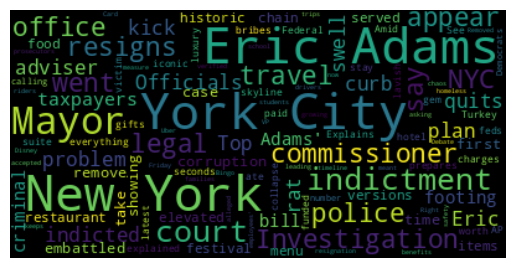

In [60]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
import nltk

In [62]:
# !pip install --upgrade nltk

In [63]:
nltk.__version__

'3.9.1'

In [64]:
from nltk.corpus import stopwords

# Ensure the stopwords corpus is downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Add custom words to the stopwords set
custom_words = ['new', 'york', 'city', 'eric', 'adams', 'nyc' ]  # Add single or multiple words
stop_words.update(custom_words)  # Use update() to add multiple words

# Now 'example' and 'test' are part of the stopwords list
print(stop_words)

{"that'll", "it's", 'both', 'have', 'to', 'itself', 'because', 'below', 'ourselves', 'there', 'under', 'eric', 'nyc', 'above', "needn't", 'mightn', "mightn't", 'shan', 'them', 'off', "isn't", 'few', 'out', 'each', 'just', "doesn't", 'how', 'whom', 'is', 'm', "shouldn't", 'why', 'won', 'before', 'do', 'now', 'new', "haven't", 'about', 'ma', 'are', 'again', 'yours', 'theirs', 'were', 'y', 're', 'in', 'mustn', 'of', 'from', 'same', 'has', 'most', 'ours', 'very', 'weren', 'yourself', 'd', 'what', "shan't", 'being', 'your', "wasn't", "you'd", 'on', "hasn't", 'here', 'for', 'him', 'wasn', 'can', 'hers', 'was', 'adams', 's', "didn't", 'its', 'over', 'after', 'those', 'own', 'during', 'down', 'where', 'through', 'doing', 'will', 'me', 'he', 'and', 'not', 'york', 've', 'had', 'yourselves', 'himself', 'who', 'such', 'don', 'this', 'needn', 'that', "you'll", 'by', 'the', 'up', 'll', 'haven', "weren't", 'into', 'his', 'an', 'between', 'their', 'only', "wouldn't", 'been', 'any', 'until', 'which', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
lowercase_string = ''.join([char.lower() for char in text_combined])

In [66]:
lowercase_string

"new york city mayor eric adams has been indicted new york city has a rat problem. officials have a plan to kick it from the curb top legal adviser to new york city mayor quits as investigations swell new york city taxpayers aren't footing the bill for eric adams' criminal corruption case what it would take to remove embattled new york city mayor eric adams from office eric adams is showing up to court for the first time since his historic indictment i went to a food festival that served elevated versions of chain restaurant menu items. here's everything i ate. the charges against nyc mayor eric adams explained in 60 seconds an iconic gem of new york city's skyline is the latest victim of the office collapse new york city police commissioner resigns, ap explains new york city police commissioner resigns amid federal investigation see the luxury hotel suite feds say eric adams paid only $600 for when the stay was worth $7,000 eric adams says his lavish, turkey-funded travels were legal 

In [67]:
no_stops = ' '.join([word for word in lowercase_string.split() if word not in stop_words])

In [68]:
no_stops

"mayor indicted rat problem. officials plan kick curb top legal adviser mayor quits investigations swell taxpayers footing bill adams' criminal corruption case would take remove embattled mayor office showing court first time since historic indictment went food festival served elevated versions chain restaurant menu items. here's everything ate. charges mayor explained 60 seconds iconic gem city's skyline latest victim office collapse police commissioner resigns, ap explains police commissioner resigns amid federal investigation see luxury hotel suite feds say paid $600 stay worth $7,000 says lavish, turkey-funded travels legal 'gifts,' bribes prepares appear court, number democrats calling resignation keeps growing indictment: travel benefits mayor alleged prosecutors accepted appear court friday: here's timeline chaos leading indictment. [removed] uber asking riders get verified safety measure drivers get vp debate bingo card right disney trips meant homeless students went school emp

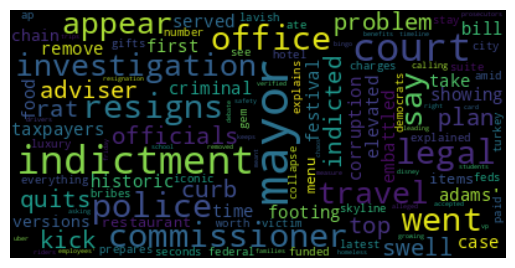

In [69]:
wordcloud = WordCloud(max_font_size=40).generate(no_stops)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.11 Converting JSON data into a Pandas Dataframe

As noted in section 1.6, it may be easier to work with the API data if it were stored in tabular format (i.e., a spreadsheet). We can use the Pandas Python library for data analysis and manipulation (https://pandas.pydata.org) to wrangle the JSON formatted data into a dataframe.

Let's follow the same steps as section 1.6:

In [33]:
import pandas as pd

In [34]:
response_json.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [35]:
response_json['status']

'ok'

In [36]:
response_json['totalResults']

19572

In [37]:
response_json['articles']

[{'source': {'id': 'business-insider', 'name': 'Business Insider'},
  'author': 'Aditi Bharade',
  'title': 'New York City Mayor Eric Adams has been indicted',
  'description': 'The mayor has been the center of a federal investigation into donations to his 2021 campaign.',
  'url': 'https://www.businessinsider.com/nyc-mayor-eric-adams-indicted-2024-9',
  'urlToImage': 'https://i.insider.com/66f4b713de59ade1a3b4abfe?width=1200&format=jpeg',
  'publishedAt': '2024-09-26T01:25:41Z',
  'content': 'New York City Mayor Eric Adams.Andrew Lichtenstein/Getty Images\r\n<ul><li>Eric Adams has been indicted, The New York Times first reported on Wednesday.</li><li>The mayor has been the center of an inve… [+643 chars]'},
 {'source': {'id': None, 'name': 'NPR'},
  'author': 'Jeongyoon Han',
  'title': 'New York City has a rat problem. Officials have a plan to kick it from the curb',
  'description': 'New York City has a well known rat problem. And the city is trying to tackle it — with trash cans an

In [38]:
type(response_json['status'])

str

In [39]:
type(response_json['totalResults'])

int

In [40]:
type(response_json['articles'])

list

In [41]:
type(response_json['articles'][0])

dict

In [42]:
df = pd.DataFrame(response_json['articles'])

In [43]:
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'business-insider', 'name': 'Business I...",Aditi Bharade,New York City Mayor Eric Adams has been indicted,The mayor has been the center of a federal inv...,https://www.businessinsider.com/nyc-mayor-eric...,https://i.insider.com/66f4b713de59ade1a3b4abfe...,2024-09-26T01:25:41Z,New York City Mayor Eric Adams.Andrew Lichtens...
1,"{'id': None, 'name': 'NPR'}",Jeongyoon Han,New York City has a rat problem. Officials hav...,New York City has a well known rat problem. An...,https://www.npr.org/2024/09/24/nx-s1-5115893/r...,https://npr.brightspotcdn.com/dims3/default/st...,2024-09-24T10:01:00Z,It was two years ago. Morningside Heights resi...
2,"{'id': None, 'name': 'NPR'}",The Associated Press,Top legal adviser to New York City mayor quits...,The top legal adviser to New York City Mayor E...,https://www.npr.org/2024/09/15/g-s1-23108/top-...,https://npr.brightspotcdn.com/dims3/default/st...,2024-09-15T17:38:24Z,NEW YORK The top legal adviser to New York Cit...
3,"{'id': 'business-insider', 'name': 'Business I...",Jacob Shamsian,New York City taxpayers aren't footing the bil...,"Defense lawyer Alex Spiro, who is representing...",https://www.businessinsider.com/eric-adams-leg...,https://i.insider.com/66f7193875c877a99b617dd2...,2024-09-27T20:55:52Z,Mayor Eric Adams leaves Manhattan Federal Cour...
4,"{'id': 'business-insider', 'name': 'Business I...","Alice Tecotzky,Lloyd Lee",What it would take to remove embattled New Yor...,NYC law outlines two ways Mayor Eric Adams cou...,https://www.businessinsider.com/eric-adams-ind...,https://i.insider.com/66f60674de59ade1a3b52386...,2024-09-27T01:38:36Z,New York City Mayor Eric Adams was indicted on...
5,"{'id': 'business-insider', 'name': 'Business I...",Jacob Shamsian,Eric Adams is showing up to court for the firs...,The indicted New York City mayor is being arra...,https://www.businessinsider.com/eric-adams-cou...,https://i.insider.com/66f6b759f9f6733e4be035fa...,2024-09-27T14:00:04Z,New York City Mayor Eric Adams arrives for his...
6,"{'id': 'business-insider', 'name': 'Business I...",Erin McDowell,I went to a food festival that served elevated...,I attended the first ChainFest in New York Cit...,https://www.businessinsider.com/review-best-me...,https://i.insider.com/66f46583de59ade1a3b49ce8...,2024-09-26T19:40:53Z,I attended the first-ever ChainFest in New Yor...
7,"{'id': 'business-insider', 'name': 'Business I...",Natalie Musumeci,The charges against NYC Mayor Eric Adams expla...,New York City Mayor Eric Adams has been charge...,https://www.businessinsider.com/new-york-city-...,https://i.insider.com/66f5883fde59ade1a3b4d4f5...,2024-09-26T16:35:38Z,New York City Mayor Eric Adams has been charge...
8,"{'id': 'business-insider', 'name': 'Business I...",Katie Balevic,An iconic gem of New York City's skyline is th...,The Chrysler Building may become the latest hi...,https://www.businessinsider.com/chrysler-build...,https://i.insider.com/66feca545ccfc192a552fdb3...,2024-10-03T18:10:46Z,The Chrysler Building.Roy Rochlin/Getty Images...
9,"{'id': None, 'name': 'Yahoo Entertainment'}",None,"New York City police commissioner resigns, AP ...",None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-09-12T19:44:40Z,"If you click 'Accept all', we and our partners..."


### 2.12 Next Step: Data Cleaning!

Looking at the dataframe above, it's clear that the data received from the NewsAPI lacks uniformity. For example, in the author column, some authors are listed with their emails, others with their locations. In addition, the source column includes both the source 'id' and 'name'.

This is a common experience when collecting data from APIs. Even though the data is shared in a structured way based on specific query parameters, this does not mean the data is clean.

Remember that the data process starts with data collection, followed by data wrangling (e.g., converting data from JSON to a dataframe) and data cleaning, which includes making sure your data is stored in consistent formats.

For example, if we wanted to clean our source column so as to just keep the name of the publication, we could first define a function:

In [44]:
def dict_to_value(dict):
    for value in dict:
        resultList = list(dict.values())
        resultList.reverse()
        return str(resultList[0])

then, apply it to our dataframe:

In [45]:
df['source'] = df['source'].apply(dict_to_value)
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,Business Insider,Aditi Bharade,New York City Mayor Eric Adams has been indicted,The mayor has been the center of a federal inv...,https://www.businessinsider.com/nyc-mayor-eric...,https://i.insider.com/66f4b713de59ade1a3b4abfe...,2024-09-26T01:25:41Z,New York City Mayor Eric Adams.Andrew Lichtens...
1,NPR,Jeongyoon Han,New York City has a rat problem. Officials hav...,New York City has a well known rat problem. An...,https://www.npr.org/2024/09/24/nx-s1-5115893/r...,https://npr.brightspotcdn.com/dims3/default/st...,2024-09-24T10:01:00Z,It was two years ago. Morningside Heights resi...
2,NPR,The Associated Press,Top legal adviser to New York City mayor quits...,The top legal adviser to New York City Mayor E...,https://www.npr.org/2024/09/15/g-s1-23108/top-...,https://npr.brightspotcdn.com/dims3/default/st...,2024-09-15T17:38:24Z,NEW YORK The top legal adviser to New York Cit...
3,Business Insider,Jacob Shamsian,New York City taxpayers aren't footing the bil...,"Defense lawyer Alex Spiro, who is representing...",https://www.businessinsider.com/eric-adams-leg...,https://i.insider.com/66f7193875c877a99b617dd2...,2024-09-27T20:55:52Z,Mayor Eric Adams leaves Manhattan Federal Cour...
4,Business Insider,"Alice Tecotzky,Lloyd Lee",What it would take to remove embattled New Yor...,NYC law outlines two ways Mayor Eric Adams cou...,https://www.businessinsider.com/eric-adams-ind...,https://i.insider.com/66f60674de59ade1a3b52386...,2024-09-27T01:38:36Z,New York City Mayor Eric Adams was indicted on...
5,Business Insider,Jacob Shamsian,Eric Adams is showing up to court for the firs...,The indicted New York City mayor is being arra...,https://www.businessinsider.com/eric-adams-cou...,https://i.insider.com/66f6b759f9f6733e4be035fa...,2024-09-27T14:00:04Z,New York City Mayor Eric Adams arrives for his...
6,Business Insider,Erin McDowell,I went to a food festival that served elevated...,I attended the first ChainFest in New York Cit...,https://www.businessinsider.com/review-best-me...,https://i.insider.com/66f46583de59ade1a3b49ce8...,2024-09-26T19:40:53Z,I attended the first-ever ChainFest in New Yor...
7,Business Insider,Natalie Musumeci,The charges against NYC Mayor Eric Adams expla...,New York City Mayor Eric Adams has been charge...,https://www.businessinsider.com/new-york-city-...,https://i.insider.com/66f5883fde59ade1a3b4d4f5...,2024-09-26T16:35:38Z,New York City Mayor Eric Adams has been charge...
8,Business Insider,Katie Balevic,An iconic gem of New York City's skyline is th...,The Chrysler Building may become the latest hi...,https://www.businessinsider.com/chrysler-build...,https://i.insider.com/66feca545ccfc192a552fdb3...,2024-10-03T18:10:46Z,The Chrysler Building.Roy Rochlin/Getty Images...
9,Yahoo Entertainment,None,"New York City police commissioner resigns, AP ...",None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-09-12T19:44:40Z,"If you click 'Accept all', we and our partners..."


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
path = "/content/drive/MyDrive/web_scraping_api" #change path to match your directory


In [48]:
df.to_csv(f"{path}/news_articles.csv", encoding='utf-8', index=False)